## Made by: Abd-Elhamed Ebrahem

**This notebook is made on colab because kaggle is crashing**

**In this notebook we will detect Potholes with YOLO11 small version**

**The data is already available on roboflow, and I added some preprocessing and Augmentations for more edge cases detection**

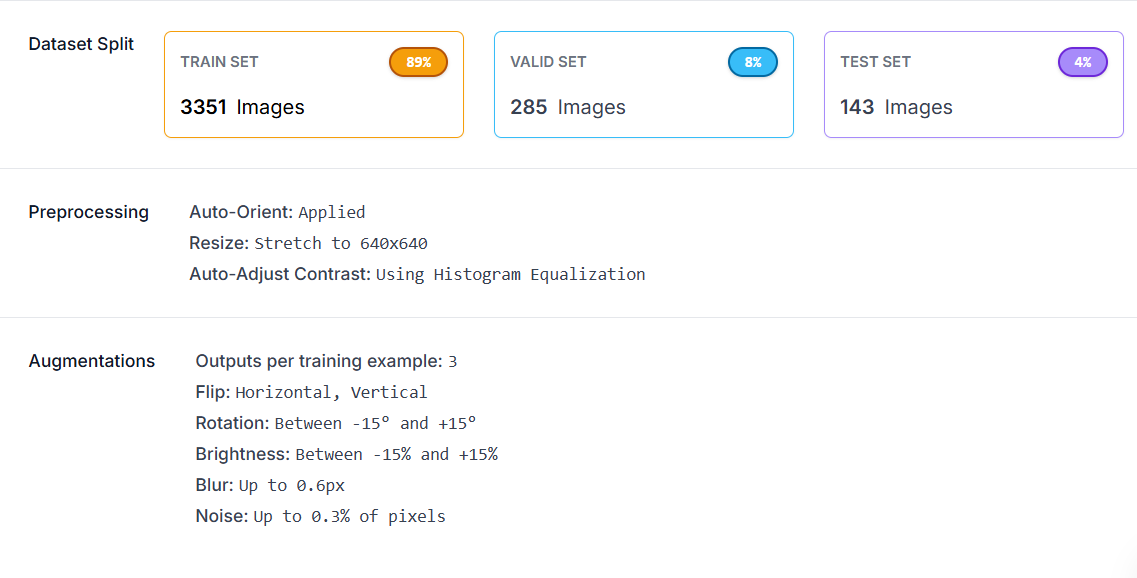

In [1]:
from PIL import Image

img = Image.open('data preprocessing.png')

img

### Import needed libraries and package installation

**These libraries have Pytorch as a requirement so make sure it is downloaded**

In [6]:
import torch
torch.__version__

'2.6.0+cu124'

In [7]:
!pip install ultralytics

In [8]:
!pip install roboflow

### Downloading data with roboflow

In [10]:
# Please feel free to ignore this, I'm just getting my api

with open('api.txt', 'r') as f:
    api = f.readline()

In [11]:
from roboflow import Roboflow

rf = Roboflow(api_key= api)
project = rf.workspace("haaaaaaaaaax").project("potholes-detect-uytky-1dabh")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to potholes-detect-1 in yolov11:: 100%|██████████| 7570/7570 [00:01<00:00, 5000.20it/s]


In [12]:
with open('potholes-detect-1/data.yaml', 'r') as f:
    data_yaml = f.readlines()

In [13]:
data_yaml

['train: ../train/images\n',
 'val: ../valid/images\n',
 'test: ../test/images\n',
 '\n',
 'nc: 74\n',
 "names: ['- -numpy-', '- -tqdm-', '- Citation', '- Description', '- Introduction', '- Requirements', '---DOI--https---zenodo.org-badge-186122711.svg---https---zenodo.org-badge-latestdoi-186122711-', '0', '13', '14', '15', '16', '17', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '38', '39', '40', '41', '42', '43', '44', '45', '46', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '67', '68', '69', '71', '72', '73', '74', '75', '76', '77', '79', 'Issues should be raised directly in the repository. For additional questions or comments please email Glenn Jocher at glenn.jocher-ultralytics.com or visit us at https---contact.ultralytics.com.', 'Potholes', 'Python 3.7 or later with the following -pip3 install -U -r requirements.txt- packages-', 'The https---github.com-ultralyt

**NOTE: if you want the class name to show in the predicted image we can add labels to yaml file but adding 79 classes manually is headache, especially we don't know the classes names, so i will just ignore it for now**

### YOLOv11s

In [14]:
from ultralytics import YOLO

model = YOLO("yolo11s.pt")

100%|██████████| 18.4M/18.4M [00:00<00:00, 419MB/s]


In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

*NOTE:*

**I encountered a problem during training: the kernel kept crashing because the VRAM would get full.**<br>
**After some research, I found that the main issues were the AMP (Automatic Mixed Precision) check and the batch size being too large for my GPU.**<br>
**To fix this, I disabled AMP and reduced the batch size, and also set the model to use half-precision (FP16) to save memory.**<br>
**These changes helped prevent the kernel from crashing during training.**<br>

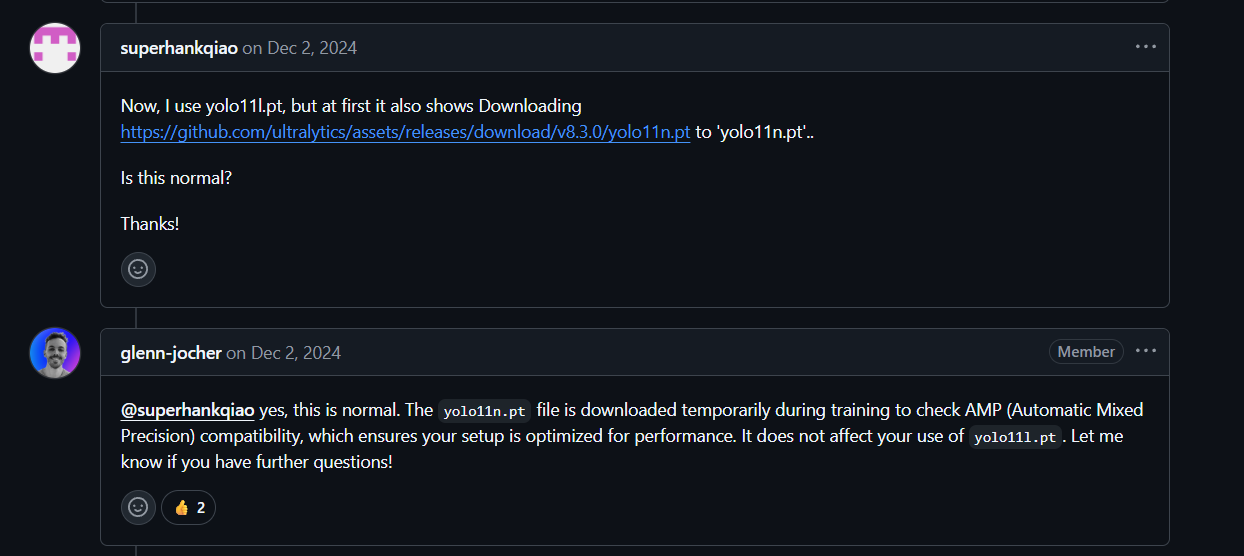

In [2]:
img = Image.open('AMP github image.png')

img

In [16]:
# I will go for 50 epochs for first try, and if the model is still not functioning well I'll just train more
results = model.train(data="potholes-detect-1/data.yaml",
                      epochs=50,
                      imgsz=640,
                      batch= 8,
                      amp= False, #Here I disable AMP check
                      half= True, #Here I cast to FP16 to use half of the gpu
                      device= device)

# all these parameters for the kernel not to crash from vram

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=potholes-detect-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

train: Scanning /content/potholes-detect-1/train/labels... 3351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3351/3351 [00:02<00:00, 1203.81it/s]


train: New cache created: /content/potholes-detect-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1182.6±693.7 MB/s, size: 87.2 KB)


val: Scanning /content/potholes-detect-1/valid/labels... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<00:00, 668.26it/s]

val: New cache created: /content/potholes-detect-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000128, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.09G       1.98      3.772       2.08         54        640: 100%|██████████| 419/419 [02:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.03it/s]

                   all        285       1135      0.302        0.3      0.259      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.94G      1.673      2.441      1.784         83        640: 100%|██████████| 419/419 [02:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]

                   all        285       1135      0.356      0.433      0.346      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.98G       1.64      2.132      1.728         41        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]

                   all        285       1135      0.373      0.386      0.358      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.02G      1.613      1.978      1.712         63        640: 100%|██████████| 419/419 [02:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.76it/s]

                   all        285       1135      0.407      0.367      0.377      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.06G      1.575      1.865       1.68         41        640: 100%|██████████| 419/419 [02:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]

                   all        285       1135       0.43      0.375      0.399      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       5.1G      1.546      1.755      1.648         82        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]

                   all        285       1135      0.424      0.517      0.409        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.14G      1.522      1.666      1.621         64        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.16it/s]

                   all        285       1135       0.42       0.42      0.414      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.18G      1.489      1.588      1.587         34        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]

                   all        285       1135      0.404      0.485      0.399      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.22G      1.475      1.538      1.582         50        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]

                   all        285       1135      0.461      0.551      0.472      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.26G      1.463      1.476      1.562         34        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.19it/s]

                   all        285       1135      0.486      0.501      0.458      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       5.3G      1.449      1.404      1.545         34        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.10it/s]

                   all        285       1135      0.534      0.496      0.495      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.34G      1.422      1.365      1.536         50        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.19it/s]

                   all        285       1135      0.545        0.5      0.507      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.38G      1.399      1.309      1.517         24        640: 100%|██████████| 419/419 [02:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.19it/s]

                   all        285       1135      0.593      0.569      0.564      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.42G      1.388      1.259      1.496         37        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]

                   all        285       1135      0.585      0.464      0.517      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.46G      1.373      1.234      1.485         57        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.19it/s]

                   all        285       1135      0.565      0.565      0.555      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       5.5G      1.369      1.198      1.482         41        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]

                   all        285       1135      0.537      0.517      0.517      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.54G      1.339      1.152      1.464         42        640: 100%|██████████| 419/419 [02:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.82it/s]

                   all        285       1135      0.567      0.495      0.515      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.58G      1.315      1.122      1.442         65        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.87it/s]

                   all        285       1135      0.571      0.595      0.555      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.62G      1.332      1.107      1.444         31        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.82it/s]

                   all        285       1135      0.568      0.574      0.566      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.66G      1.304      1.079      1.435         97        640: 100%|██████████| 419/419 [02:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.81it/s]

                   all        285       1135      0.547      0.546      0.527      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       5.7G      1.275      1.024      1.405         51        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.81it/s]

                   all        285       1135      0.502      0.563      0.526      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.74G      1.271       1.01      1.395         60        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.84it/s]

                   all        285       1135      0.529      0.565      0.539      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.78G      1.251     0.9959      1.387         37        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.84it/s]

                   all        285       1135      0.575      0.556      0.548      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.82G      1.242     0.9654      1.374         46        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.86it/s]

                   all        285       1135      0.554      0.606       0.56      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.86G       1.22     0.9533      1.366         27        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.84it/s]

                   all        285       1135      0.601      0.534      0.546      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.9G      1.209     0.9256      1.353         59        640: 100%|██████████| 419/419 [02:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.85it/s]

                   all        285       1135      0.551      0.594      0.533      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.94G      1.199      0.907      1.349         52        640: 100%|██████████| 419/419 [02:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.82it/s]

                   all        285       1135      0.581      0.565       0.55      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.98G      1.176     0.8933      1.333         31        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]

                   all        285       1135      0.553      0.604      0.554      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.02G      1.176     0.8805      1.333         74        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]

                   all        285       1135      0.589      0.566      0.571      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.06G      1.154      0.854      1.318         54        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.87it/s]

                   all        285       1135      0.559      0.587      0.557      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       6.1G      1.149     0.8485      1.312         37        640: 100%|██████████| 419/419 [02:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.93it/s]

                   all        285       1135      0.567      0.559      0.522       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.14G      1.142     0.8488        1.3         42        640: 100%|██████████| 419/419 [02:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.80it/s]

                   all        285       1135      0.599      0.591      0.559      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.18G       1.13     0.8292      1.294         56        640: 100%|██████████| 419/419 [02:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.81it/s]

                   all        285       1135      0.613      0.596      0.581      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.22G      1.119     0.8135      1.291         80        640: 100%|██████████| 419/419 [02:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.87it/s]

                   all        285       1135      0.612      0.608      0.583      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.26G      1.105     0.8041      1.283         43        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.78it/s]

                   all        285       1135      0.631      0.606      0.611      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       6.3G      1.098     0.7989      1.272         42        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.86it/s]

                   all        285       1135       0.63      0.593      0.583      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.34G      1.083     0.7839      1.268         44        640: 100%|██████████| 419/419 [02:26<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.48it/s]

                   all        285       1135      0.572      0.614      0.562      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.38G       1.07     0.7714       1.26         79        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.87it/s]

                   all        285       1135      0.599      0.606      0.581      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.42G      1.076     0.7603      1.256         89        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.85it/s]

                   all        285       1135      0.616      0.593       0.57      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.46G      1.055     0.7523      1.248         36        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.83it/s]

                   all        285       1135      0.568      0.591      0.563       0.35


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       6.5G      1.068      0.641      1.266         35        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.81it/s]

                   all        285       1135      0.589      0.583      0.576      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.54G      1.025     0.6041      1.243         33        640: 100%|██████████| 419/419 [02:25<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.80it/s]

                   all        285       1135      0.623      0.579      0.567      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.58G      1.003     0.5709      1.223         11        640: 100%|██████████| 419/419 [02:25<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]

                   all        285       1135      0.626       0.58      0.576      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.62G     0.9926     0.5709      1.216         17        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]

                   all        285       1135      0.631      0.578      0.577      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.66G     0.9871     0.5662      1.213         28        640: 100%|██████████| 419/419 [02:26<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]

                   all        285       1135      0.611      0.593      0.567      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       6.7G     0.9523      0.541      1.188         51        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]

                   all        285       1135      0.619      0.599      0.584      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.74G     0.9524     0.5394      1.197         30        640: 100%|██████████| 419/419 [02:25<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]

                   all        285       1135      0.633      0.588      0.571      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.78G     0.9512     0.5383       1.19         35        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]

                   all        285       1135      0.659      0.589      0.594      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.82G     0.9377     0.5239       1.18         35        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]

                   all        285       1135      0.657      0.606      0.603      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.86G     0.9337     0.5259      1.182         20        640: 100%|██████████| 419/419 [02:26<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]

                   all        285       1135      0.648      0.585      0.587      0.365



50 epochs completed in 2.107 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,441,438 parameters, 0 gradients, 21.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.12it/s]


                   all        285       1135      0.656      0.606      0.603      0.371
                     0        260       1028      0.875        0.9      0.926      0.633
              Potholes         25        107      0.436      0.311       0.28       0.11
Speed: 0.5ms preprocess, 9.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


### Evaluation

**We don't need to acctually evaluate the model ourselves.**

**Every thing we need is in the runs folder**

In [17]:
# Results.csv file

import pandas as pd

results_csv = pd.read_csv('runs/detect/train/results.csv')

results_csv.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,6981.40,0.95230,0.54103,1.18781,0.61915,0.59914,0.58381,0.36811,1.25074,0.74843,1.37245,0.000014,0.000014,0.000014
46,47,7132.26,0.95244,0.53944,1.19677,0.63258,0.58763,0.57102,0.35621,1.25731,0.76523,1.38073,0.000011,0.000011,0.000011
47,48,7283.24,0.95116,0.53830,1.19025,0.65900,0.58853,0.59370,0.36786,1.24161,0.74007,1.36677,0.000009,0.000009,0.000009
48,49,7434.43,0.93769,0.52392,1.17982,0.65711,0.60622,0.60347,0.37110,1.24654,0.73978,1.37125,0.000006,0.000006,0.000006
49,50,7585.66,0.93371,0.52591,1.18224,0.64848,0.58523,0.58696,0.36526,1.24628,0.74531,1.36442,0.000004,0.000004,0.000004


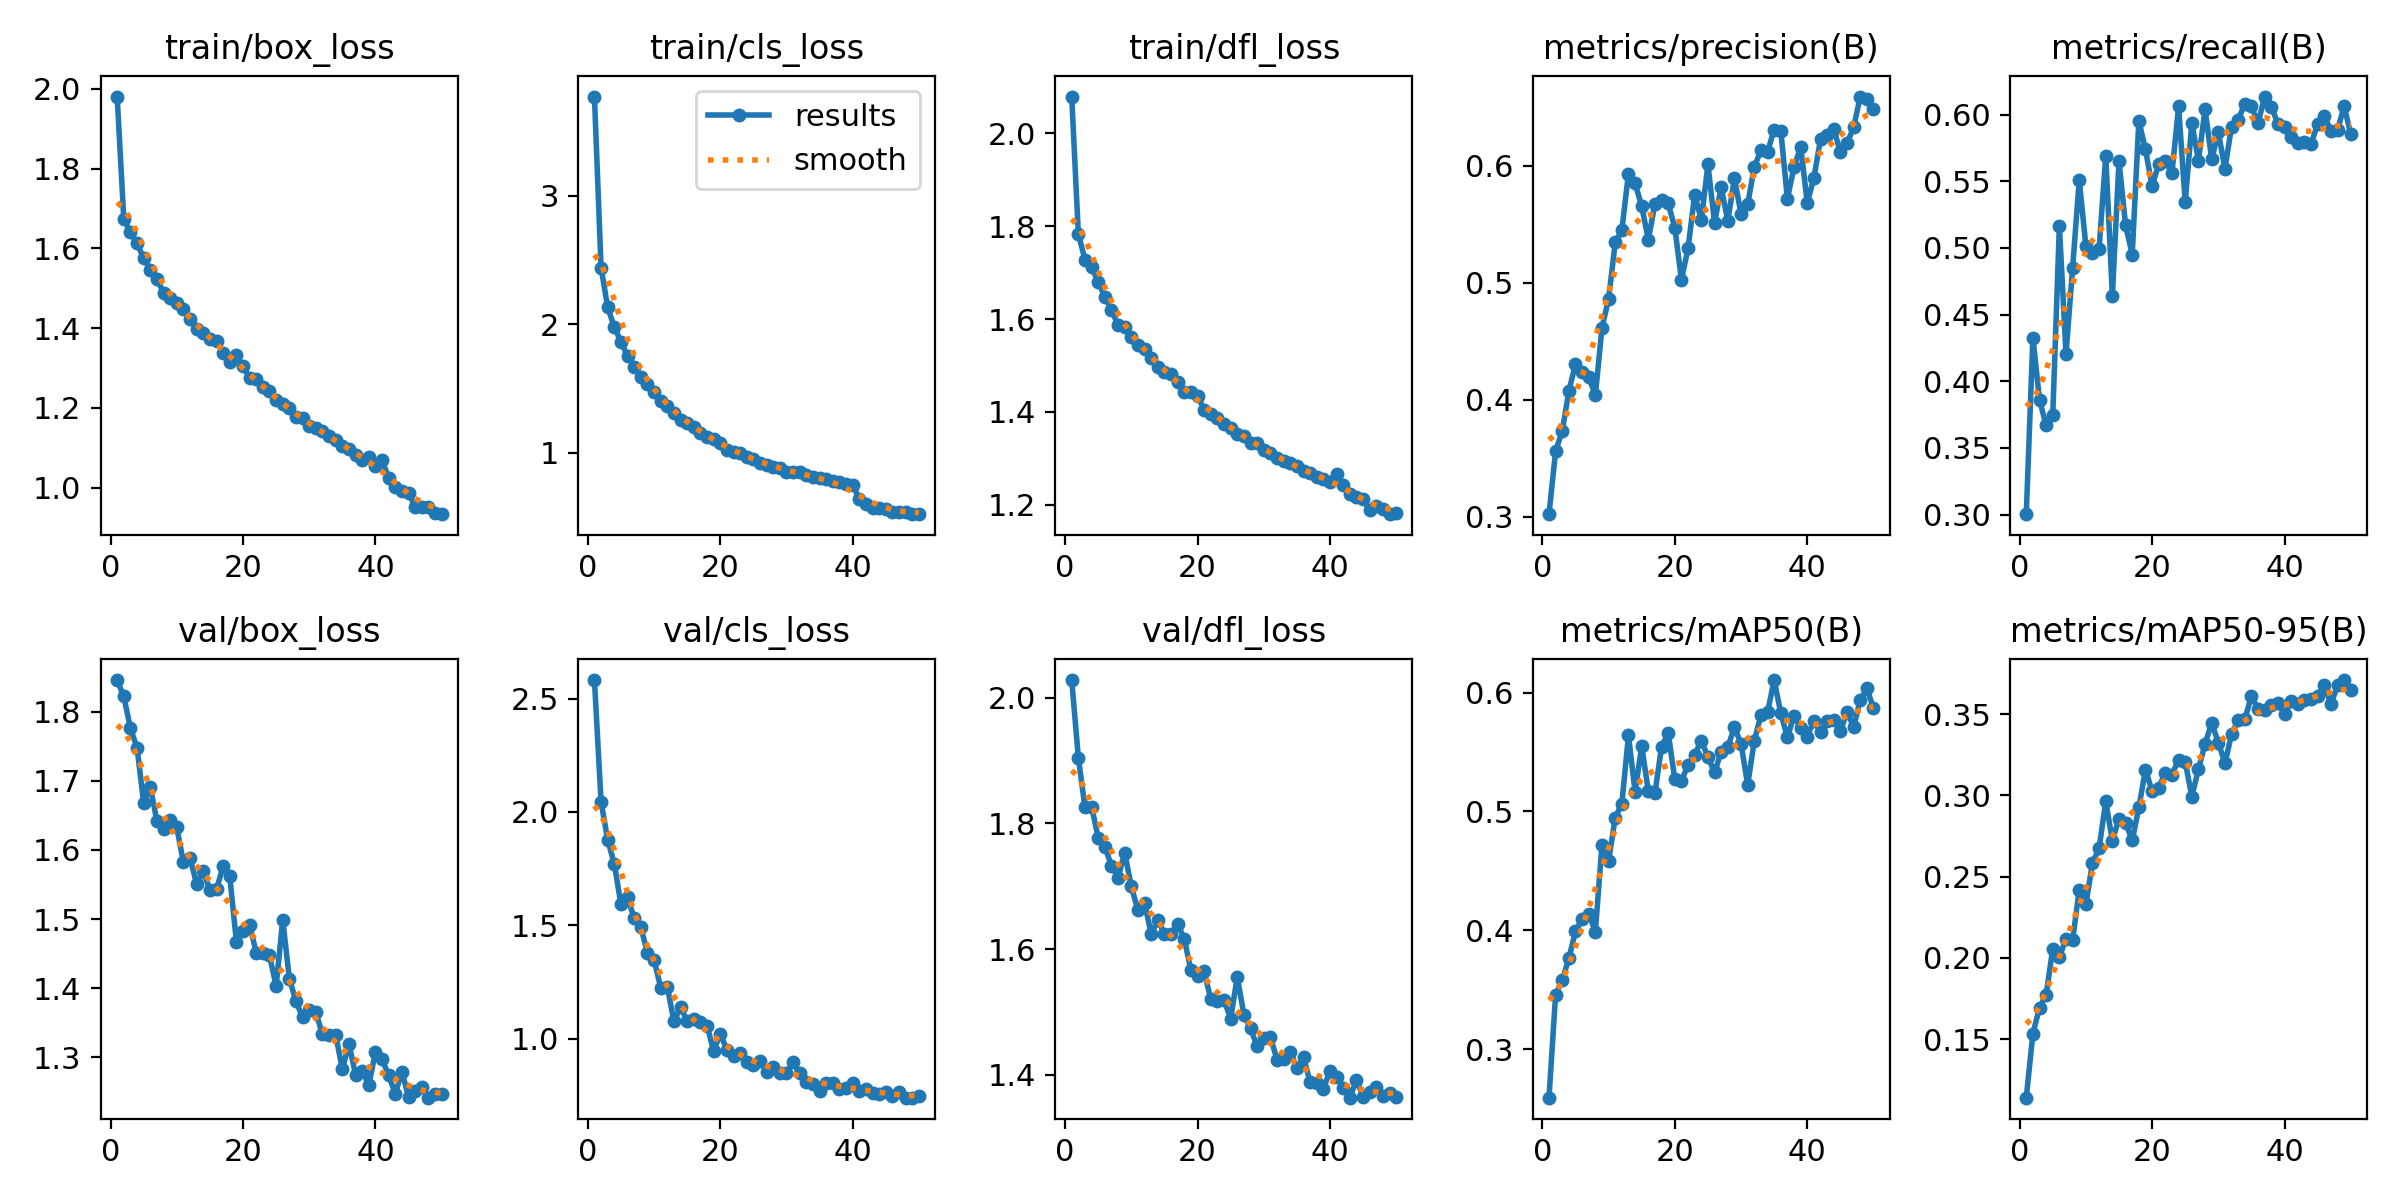

In [19]:
from PIL import Image

img = Image.open('/content/runs/detect/train/results.png')

img

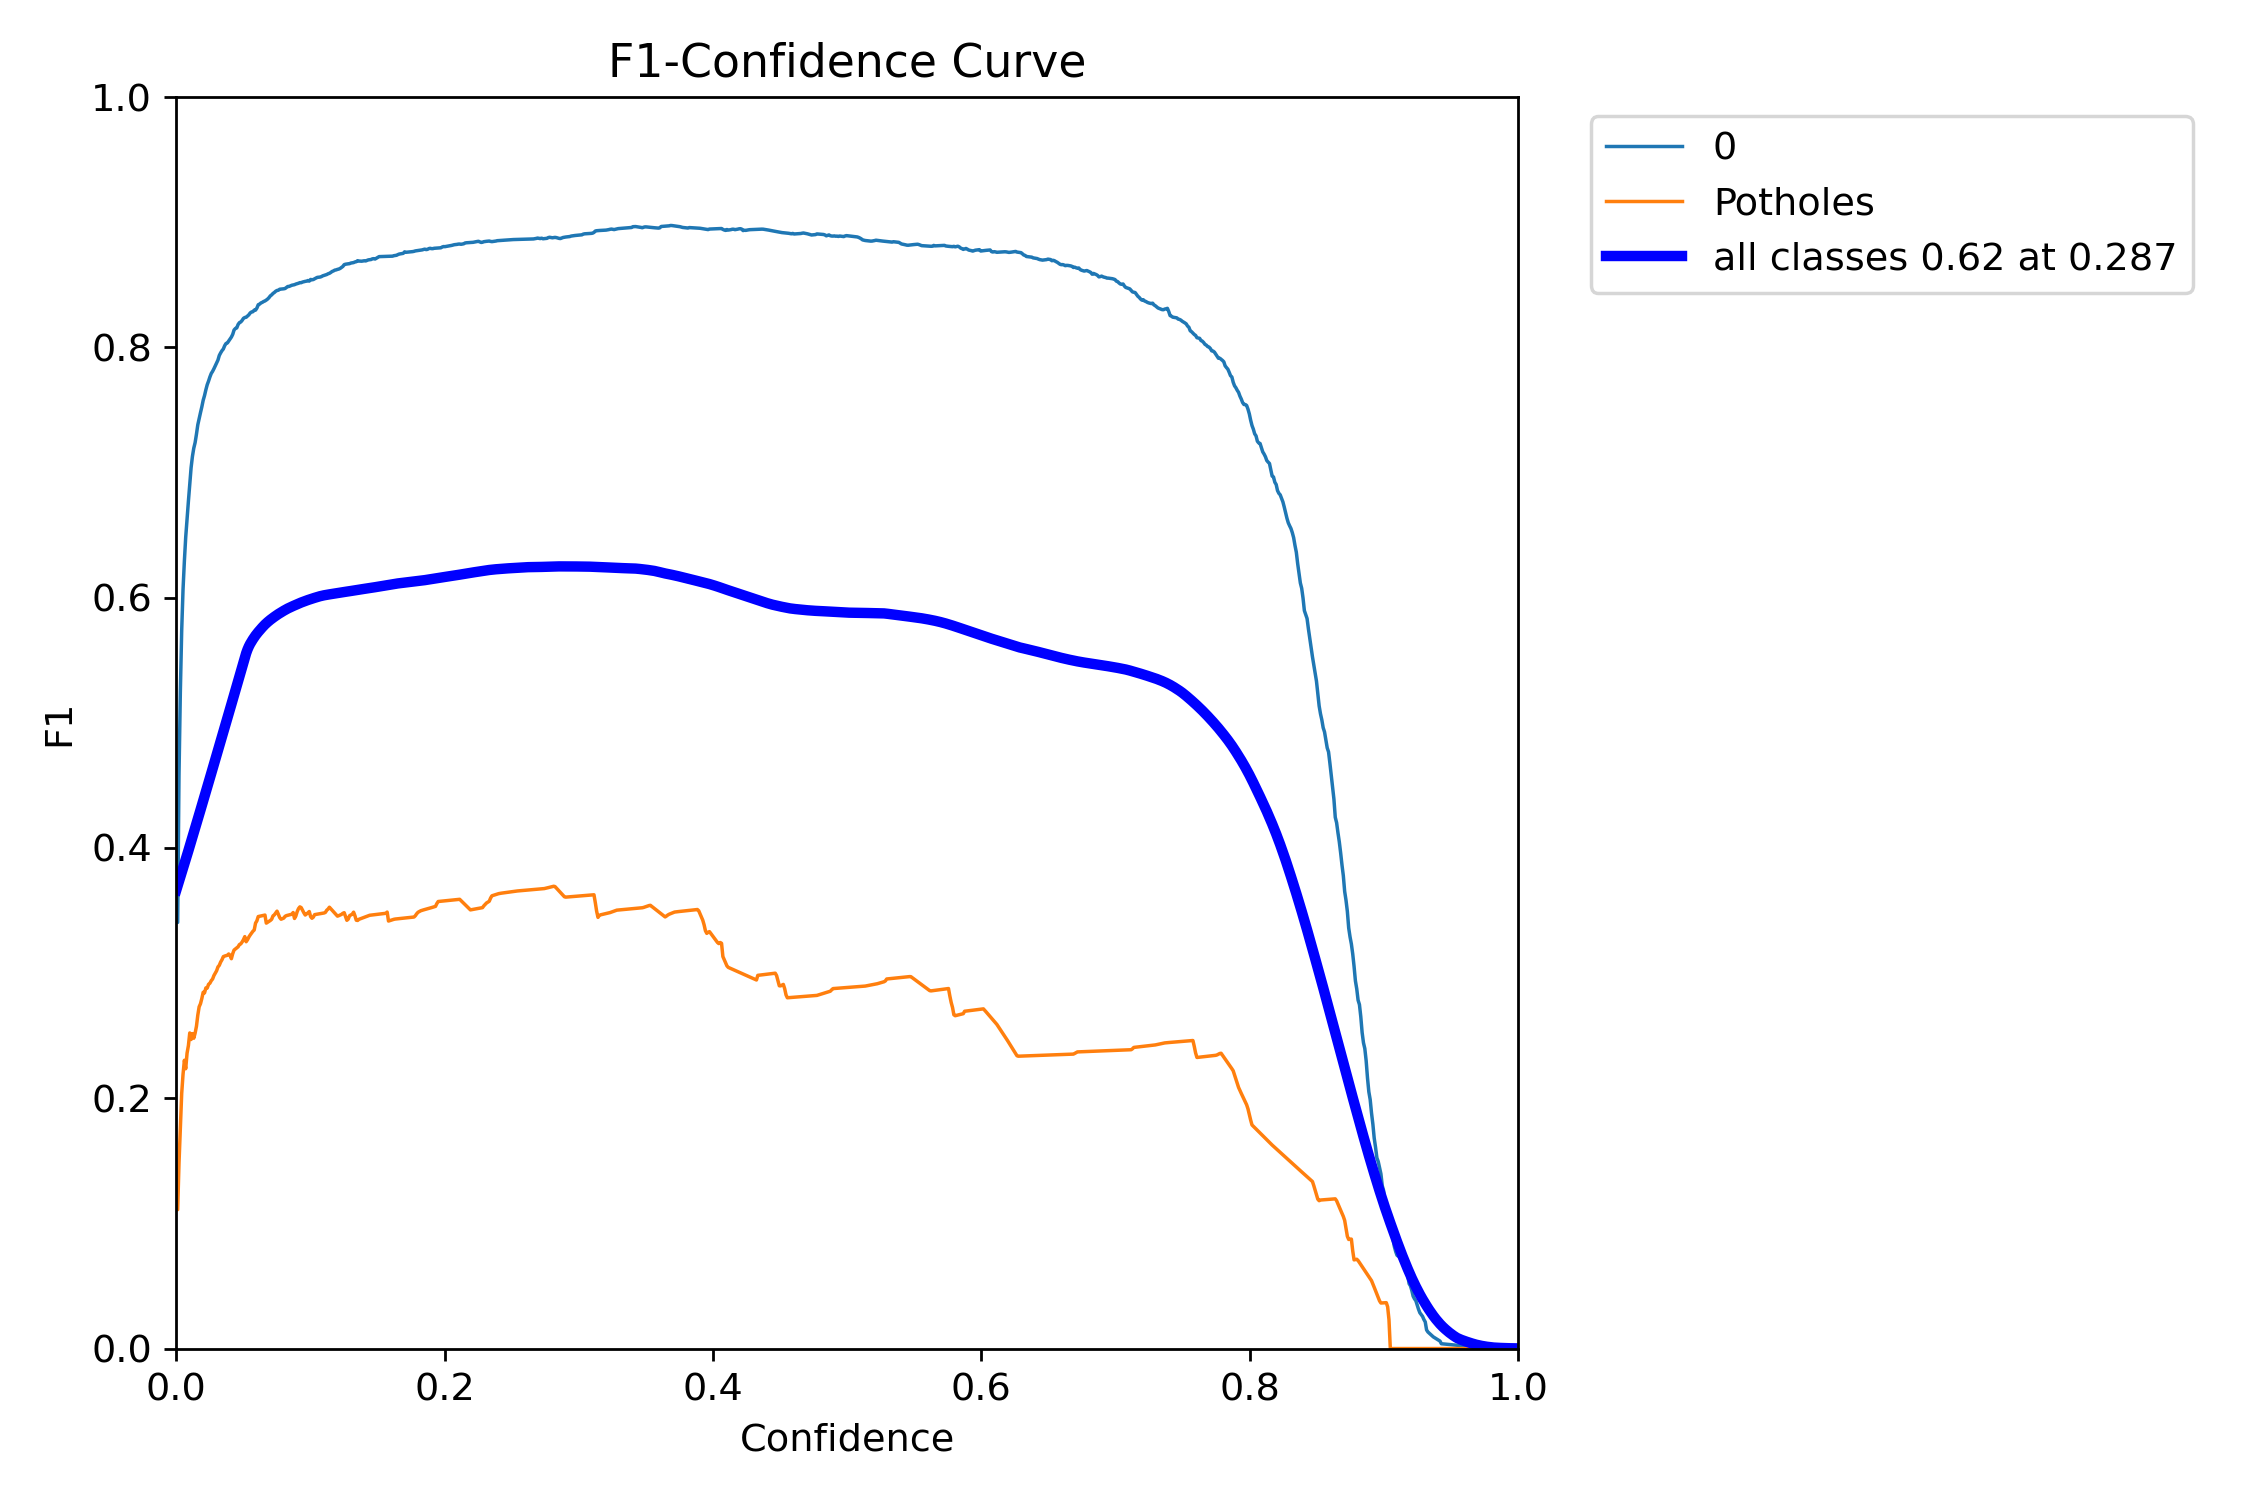

In [20]:
# F1-curve

f1 = Image.open('/content/runs/detect/train/F1_curve.png')
f1

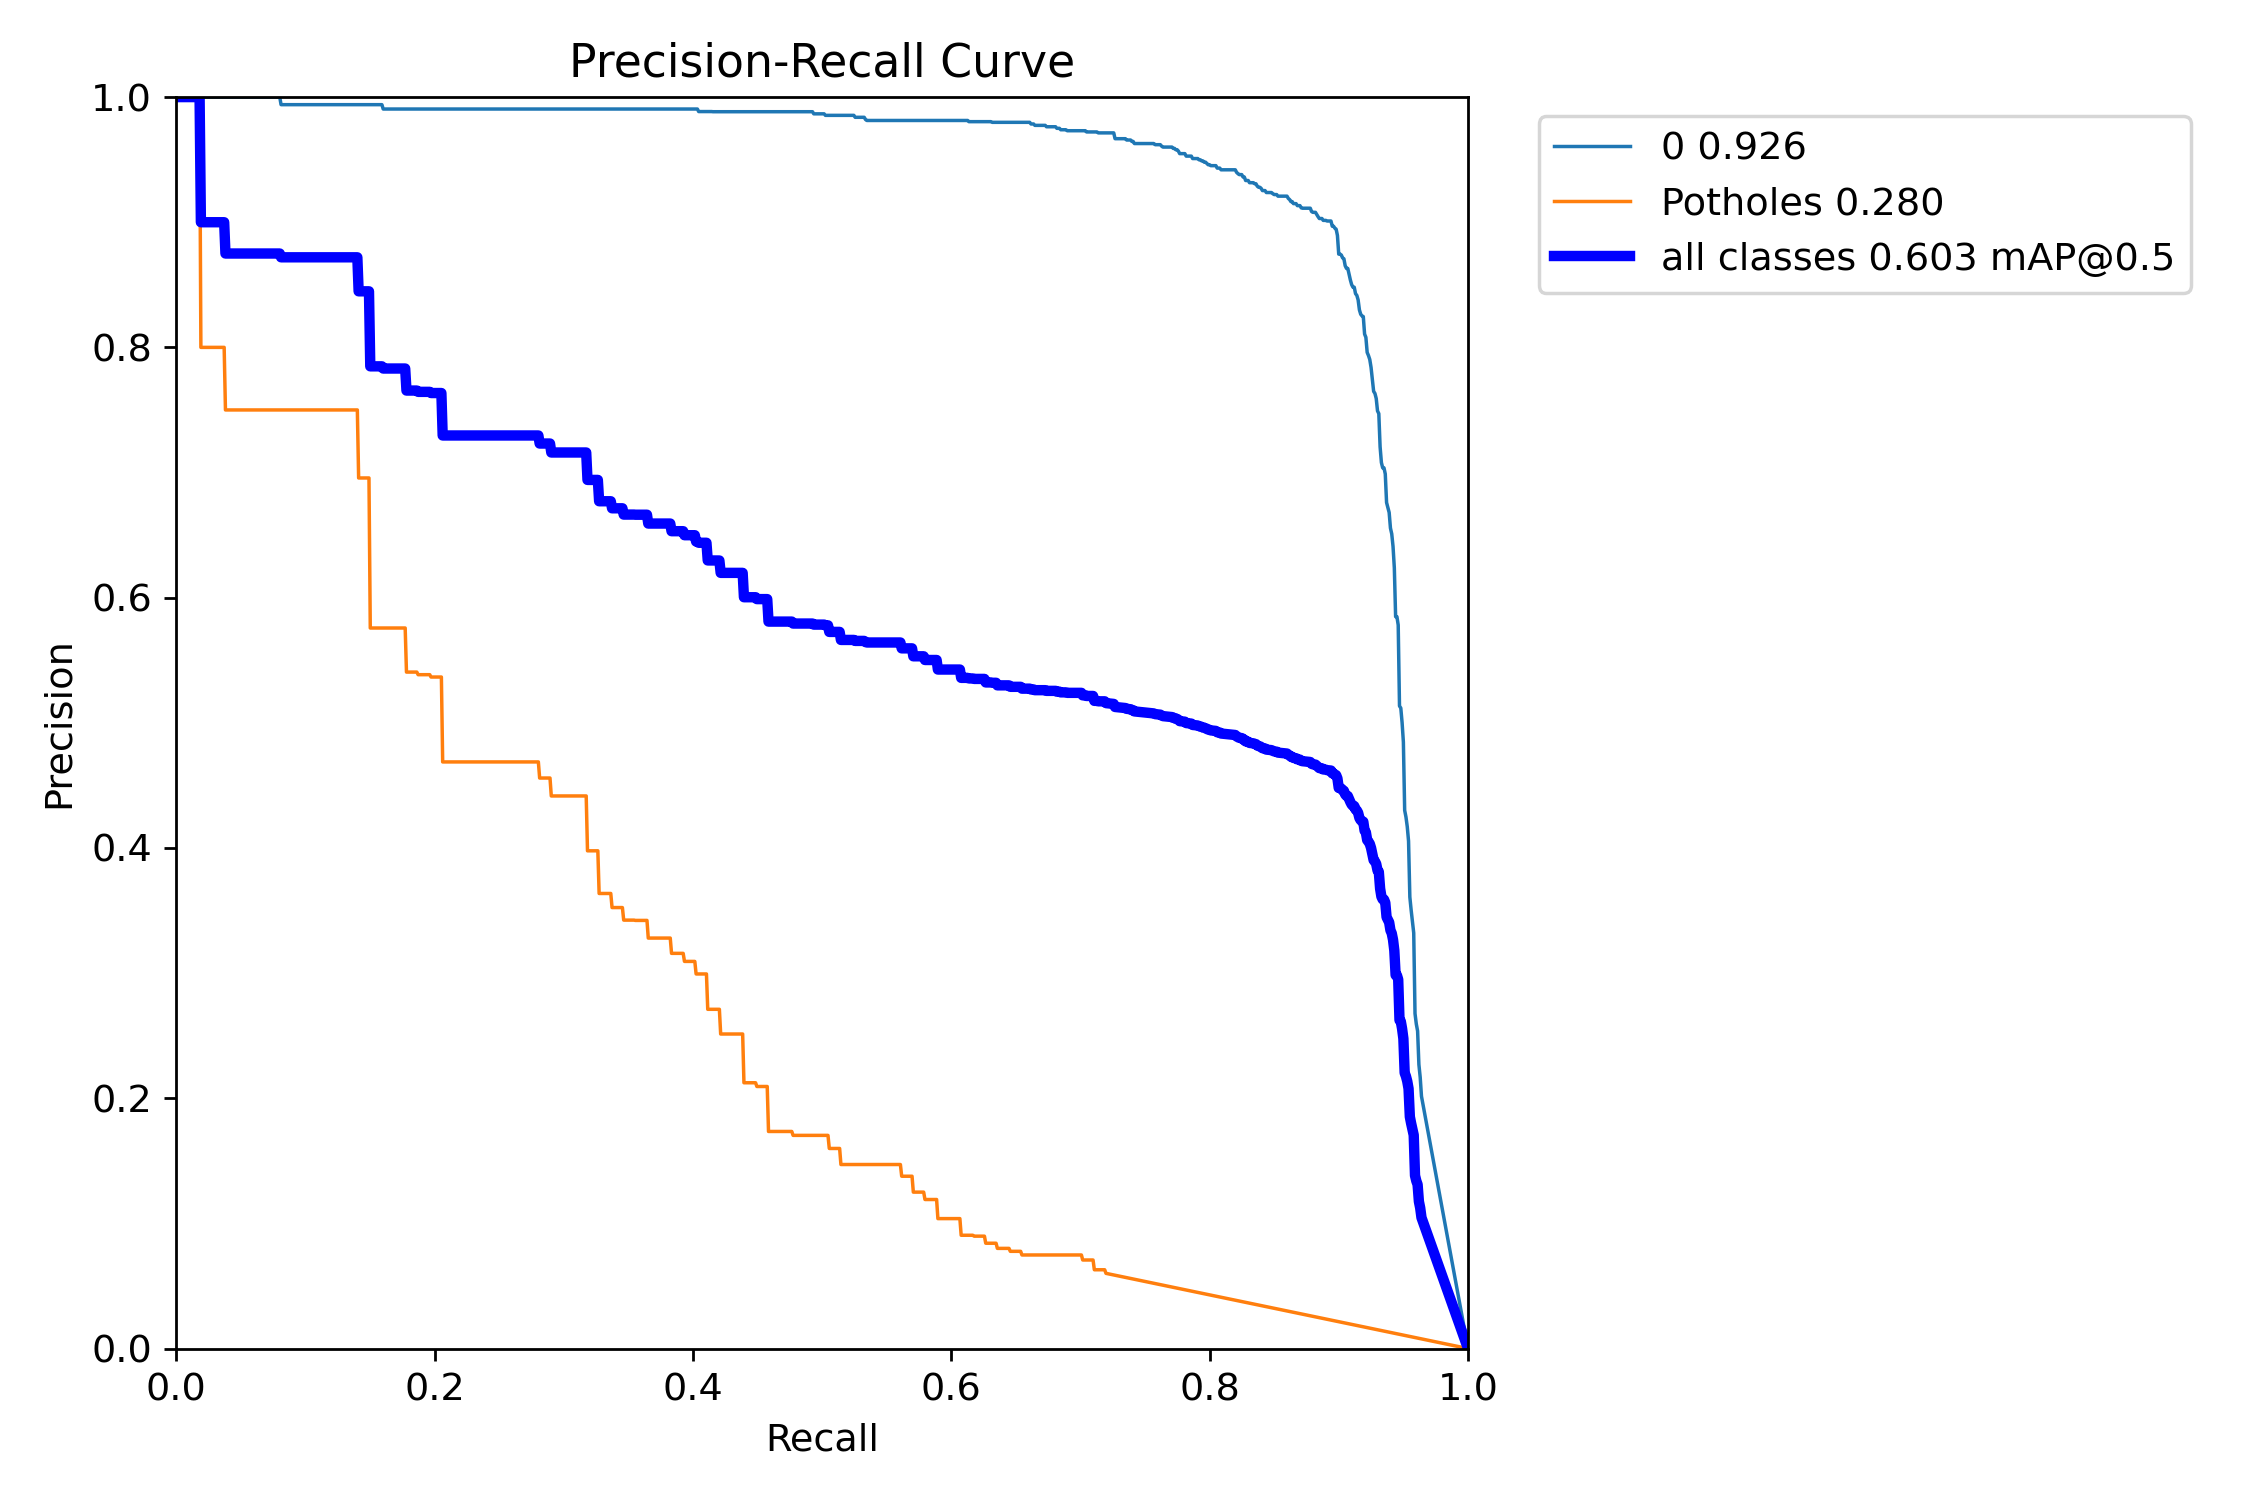

In [21]:
# Percision-Recall_curve

PR_curve = Image.open('/content/runs/detect/train/PR_curve.png')
PR_curve

### Inference


image 1/1 /content/potholes-detect-1/test/images/183_jpg.rf.390043b8ec58e6f181e201f4ca0da65c.jpg: 640x640 20 0s, 15.8ms
Speed: 2.3ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


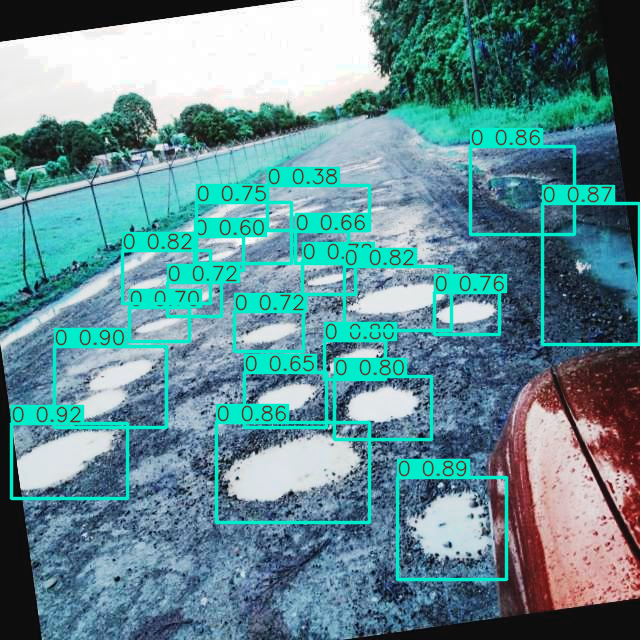

In [24]:
from ultralytics import YOLO
from PIL import Image

pred_model = YOLO('/content/runs/detect/train/weights/best.pt')

res_image = pred_model.predict('/content/potholes-detect-1/test/images/183_jpg.rf.390043b8ec58e6f181e201f4ca0da65c.jpg')

res_image = res_image[0]

img = res_image.plot()

pil_image = Image.fromarray(img)

pil_image

**Please feel free to ignore this section i will zip the folder to download on my computer**

In [25]:
!zip -r runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 2%)
  adding: content/runs/detect/train/results.csv (deflated 60%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/R_curve.png (deflated 12%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 5%)
  adding: content/runs/detect/train/labels.jpg (deflated 23%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 4%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 24%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/PR_curve.png (deflated 13%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflate